In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Company Stock and Investment.csv")

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df=df.drop(['Oil Investments','Comp Stock','Other sharesInvestments'],axis=1)

In [5]:
df

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221
...,...,...
1979,09-11-2017,0.000623
1980,10-11-2017,-0.000389
1981,13-11-2017,-0.004944
1982,14-11-2017,-0.002621


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1984 non-null   object 
 1   Gold Investments  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [7]:
df.isnull().sum()

Date                0
Gold Investments    0
dtype: int64

In [8]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-01-04,0.001097
2,2010-01-05,0.001560
3,2010-01-06,0.006009
4,2010-01-07,0.000221
...,...,...
1979,2017-11-09,0.000623
1980,2017-11-10,-0.000389
1981,2017-11-13,-0.004944
1982,2017-11-14,-0.002621


In [9]:
df.set_index('Date', inplace=True)

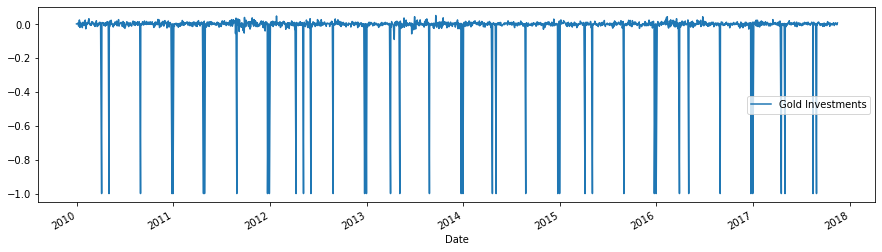

In [10]:
df.plot(figsize=(15,4))

From the above we can see that there is a seasonal decline in stock values of gold

In [11]:
def adf_test(price):
    result=adfuller(price) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [12]:
adf_test(df['Gold Investments'])

ADF Test Statistic : -15.906853851669043
p-value : 8.208405770369246e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


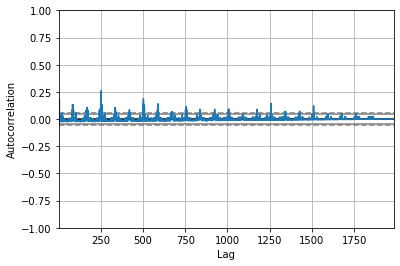

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Gold Investments']) 
plt.show()


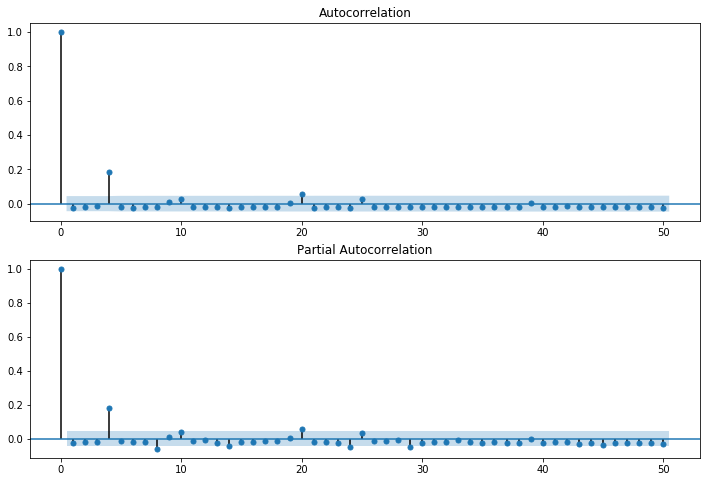

In [14]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Gold Investments'],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Gold Investments'],lags=50,ax=ax2)

So from the above Auto correlation plot we can see that there is no strong evidance.

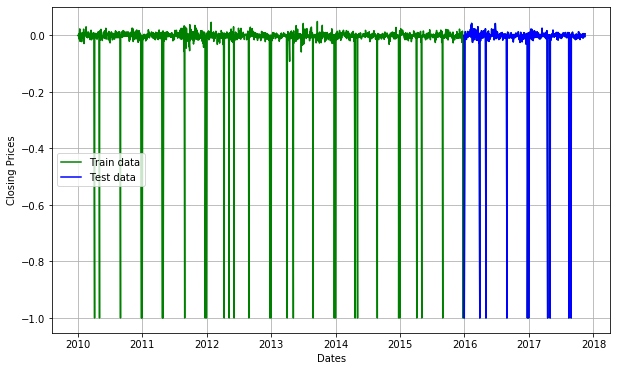

In [15]:
size=int(len(df)*0.76)
train_data, test_data = df[0:size], df[size:]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data,order=(5,1,1)) # this order is p d q(0 or 1) 
results=model.fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Gold Investments   No. Observations:                 1506
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 846.296
Method:                       css-mle   S.D. of innovations              0.138
Date:                Thu, 22 Oct 2020   AIC                          -1676.593
Time:                        11:15:57   BIC                          -1634.055
Sample:                             1   HQIC                         -1660.749
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -2.55e-06    9.4e-06     -0.271      0.786    -2.1e-05    1.59e-05
ar.L1.D.Gold Investments    -0.0185      0.026     -0.706      0.480      -0.070       0.033
ar.L2.D.Gold Investments    -0.0149      0.026     -0.578      0.563      -0.065       0.036
ar.L3.D.Gold Investments    -0.0081      0.026     -0.315      0.752      -0.059       0.042
ar.L4.D.Gold Investments     0.1891      0.026      7.351      0.000       0.139       0.240
ar.L5.D.Gold Investments    -0.0131      0.026     -0.500      0.617      -0.064       0.038
ma.L1.D.Gold Investments    -1.0000      0.002   -589.207      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4723           -0.0000j            1.4723           -0.5000
AR.2           -0.0382           -1.5007j            1.5011           -0.2541
AR.3           -0.0382           +1.5007j            1.5011            0.2541
AR.4            1.5995           -0.0000j            1.5995           -0.0000
AR.5           14.4020           -0.0000j           14.4020           -0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

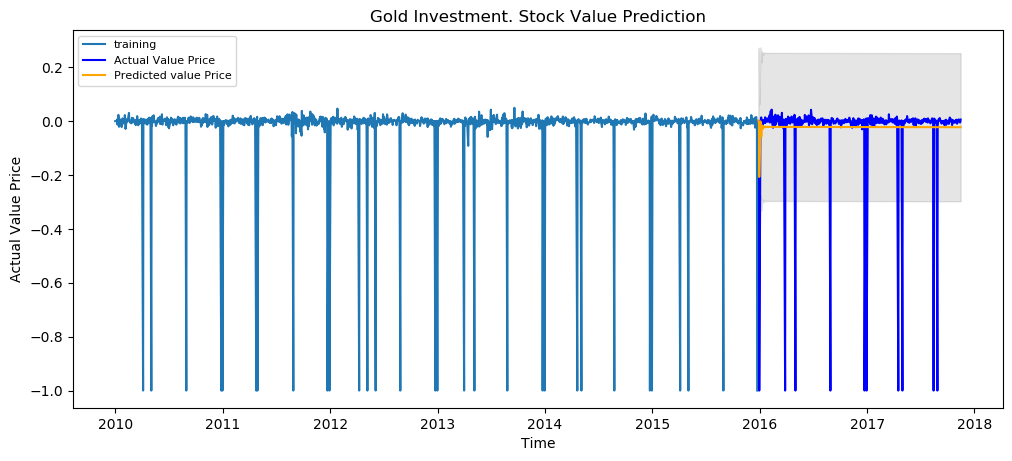

In [18]:
#Now let's start forecast the stock prices on the test dataset keeping 95% confidence level.
fc, se, conf = results.forecast(477, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Value Price')
plt.plot(fc_series, color = 'orange',label='Predicted value Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Gold Investment. Stock Value Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Value Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

From the above we can see that there is an overlapping as the negative value as most of the values tends to 0 to negative.

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

MSE: 0.01993353389422753
MAE: 0.0418498329338141
RMSE: 0.14118616750315


In [33]:
fc_series

Date
2015-12-28    0.002954
2015-12-29   -0.004404
2015-12-30   -0.011364
2015-12-31   -0.207167
2016-01-04   -0.000722
                ...   
2017-11-09   -0.022453
2017-11-10   -0.022456
2017-11-13   -0.022458
2017-11-14   -0.022461
2017-11-15   -0.022464
Length: 477, dtype: float64

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,1508)]

In [36]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [37]:
future_datest_df.tail()

,Gold Investments,forecast
2021-12-27,NaN,NaN
2021-12-28,NaN,NaN
2021-12-29,NaN,NaN
2021-12-30,NaN,NaN
2021-12-31,NaN,NaN


In [38]:
fc1, se1, conf1 = results.forecast(1507, alpha=0.05)  # 95% confidence
fc1_series = pd.Series(fc1, index=future_datest_df.index)

In [39]:
fc1_series

2017-11-16    0.002954
2017-11-17   -0.004404
2017-11-18   -0.011364
2017-11-19   -0.207167
2017-11-20   -0.000722
                ...   
2021-12-27   -0.025080
2021-12-28   -0.025083
2021-12-29   -0.025085
2021-12-30   -0.025088
2021-12-31   -0.025090
Length: 1507, dtype: float64

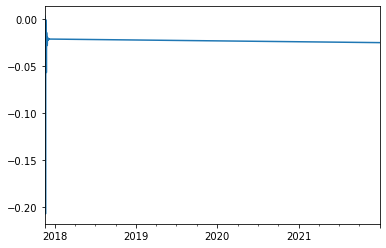

In [40]:
fc1_series.plot()

In [41]:
fc1_series.to_excel("Gold_Investment_Prediction.xlsx")

From the above we can se that the stock values are decreasing over time, so probably not the best option as well